# Valeria Card Kingdoms:
## Finding an edge

As a Duke of Valeria, you amass a population of citizens. Each citizen produces resources when their card is activated. Activation is determined by dice roll.

This game uses 2 dice to randomize citizen activation, but the mechanics are slightly different than other dice games. Like other games, the dice are rolled, and the sum of the dice dictate which resources are allocated, but in addition, the value shown on each die also triggers resource generation.

Complicating matters further, some outcomes are triggered by a roll of multiple numbers. 

This unusual mechanism alters the familiar bell curve of probability, specifically boosting the probability of rolls 1-6. I think a 4 will be more likely than an 8, but how much more likely? Let's find out!

### Determine the roll probabilities
We'll perform a simulation to determine the probabilities: roll 2 dice 100 000 times and tally the results along the way. If our number of simulations is sufficiently large, the outcome should be pretty accurate.

Text(0.5,1,'Roll Activation Probabilities')

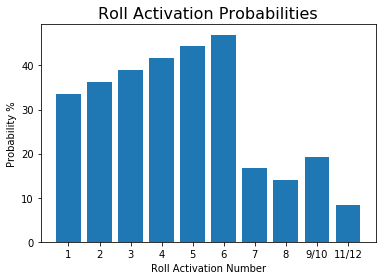

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

# Define an empty array to tally the frequency of each dice roll
freqs = np.zeros((13))

# Simulate 100 000 rolls
for i in range(100000):
    # Randomly generate a value for each die (two dice are used)
    a,b = np.random.randint(1,7,2)
    # Increase the tally by 1 for the result of each die, and
    # for the sum of the die values
    freqs[a] += 1
    freqs[b] += 1
    freqs[a+b] += 1
    
# The game combines roll values (9, 10), and (11, 12).
# Make sure our frequencies follow suit.
freqs_final = np.append(freqs[1:9], freqs[9]+freqs[10])
freqs_final = np.append(freqs_final, freqs[11]+freqs[12])

# Calculate the probability for a given roll:
roll_probs = freqs_final/100000


#Prepare a chart showing the frequency of each roll

# Create an x-axis and x labels
x=(1,2,3,4,5,6,7,8,9,10)
xlabels=(1,2,3,4,5,6,7,8,'9/10','11/12')

# Plot the chart
plt.bar(x,roll_probs*100)
plt.xticks(x, xlabels)
plt.ylabel('Probability %')
plt.xlabel('Roll Activation Number')
plt.title('Roll Activation Probabilities', fontsize=16)

It's clear that this probability distribution is quite different that the one normally associated with dice. So how much more likely is a 4 than an 8?

In [2]:
round(roll_probs[3]/roll_probs[7],5)

2.98503

And there you have it: you're about 3 times more likely to roll a 4 than an 8.